<a href="https://colab.research.google.com/github/atonui/coup_prediction_model/blob/main/Insurrection_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective**

The aim of this investigation is to build an ML model that can predict coups, based on historic and economic data trends

**Datasets**
*   Historic Data(previous coups) : [Kaggle](https://www.kaggle.com/datasets/michaelbryantds/coup-outcomes)
*   Economic/GDP Data: https://data.worldbank.org/indicator/NY.GDP.PCAP.CD
*   Democracy Index : [Economist Intelligence](https://www.eiu.com/n/campaigns/democracy-index-2022/)
*   Oil Deposits in Countries : [wikipedia](https://en.wikipedia.org/wiki/List_of_countries_by_proven_oil_reserves)
*   Inequality Data (class & tribal): [gini index](https://worldpopulationreview.com/country-rankings/gini-coefficient-by-country)


## Importing the Libraries and Loading the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# from numpy import isnan

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import seaborn as sns
sns.set_style("whitegrid", {'axes.grid':False})

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r'/content/drive/MyDrive/Coup_Data_v2.0.0.csv')
df.sample(10)

,coup_id,cowcode,country,year,month,day,event_type,unrealized,realized,conspiracy,...,counter,other,noharm,injured,killed,harrest,jailed,tried,fled,exile
450,4106011984,41,Haiti,1984,6,1,conspiracy,1,0,1,...,0,0,1,0,0,0,0,0,0,0
185,35511101989,355,Bulgaria,1989,11,10,coup,0,1,0,...,0,0,1,0,0,0,0,0,0,0
338,65104281954,651,Egypt,1954,4,28,conspiracy,1,0,1,...,0,0,1,0,0,0,0,0,0,0
382,45210031961,452,Ghana,1961,10,3,conspiracy,1,0,1,...,0,0,1,0,0,0,0,0,0,0
397,35012131967,350,Greece,1967,12,13,attempted,1,0,0,...,0,0,1,0,0,0,0,0,1,1
803,11508151980,115,Surinam,1980,8,15,coup,0,1,0,...,0,0,1,0,0,1,0,0,0,0
492,64507141958,645,Iraq,1958,7,14,coup,0,1,0,...,0,0,0,0,1,0,0,0,0,0
370,48102171964,481,Gabon,1964,2,17,coup,0,1,0,...,0,0,1,0,0,0,1,0,0,0
93,54005271977,540,Angola,1977,5,27,attempted,1,0,0,...,0,0,1,0,0,0,0,0,0,0
117,16012031990,160,Argentina,1990,12,3,attempted,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [4]:
df[['country', 'event_type', 'realized', 'unrealized']].sample(50)

,country,event_type,realized,unrealized
227,Chad,attempted,0,1
600,Mozambique,conspiracy,0,1
28,Gabon,attempted,0,1
634,Nigeria,coup,1,0
447,Haiti,coup,1,0
8,Guinea-Bissau,attempted,0,1
588,Mauritania,conspiracy,0,1
147,Bolivia,attempted,0,1
298,Czechoslovakia,coup,1,0
423,Guinea,conspiracy,0,1


- The column 'realized' when equal to 1, and 'coup' mean the same thing.

### Exploring the Data

###### a)Getting a Brief overview of the data  

In [5]:
df.head()

,coup_id,cowcode,country,year,month,day,event_type,unrealized,realized,conspiracy,...,counter,other,noharm,injured,killed,harrest,jailed,tried,fled,exile
0,43910302014,439,Burkina Faso,2014,10,30,coup,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1,51605132015,516,Burundi,2015,5,13,attempted,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,48304132006,483,Chad,2006,4,13,attempted,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,65102112011,651,Egypt,2011,2,11,coup,0,1,0,...,0,0,1,0,0,0,1,1,0,0
4,65107032013,651,Egypt,2013,7,3,coup,0,1,0,...,0,0,1,0,0,0,1,1,0,0


In [6]:
df.tail()

,coup_id,cowcode,country,year,month,day,event_type,unrealized,realized,conspiracy,...,counter,other,noharm,injured,killed,harrest,jailed,tried,fled,exile
938,55106141981,551,Zambia,1981,6,14,conspiracy,1,0,1,...,0,0,1,0,0,0,0,0,0,0
939,55110071988,551,Zambia,1988,10,7,conspiracy,1,0,1,...,0,0,1,0,0,0,0,0,0,0
940,55106301990,551,Zambia,1990,6,30,attempted,1,0,0,...,0,0,1,0,0,0,0,0,0,0
941,55110281997,551,Zambia,1997,10,28,attempted,1,0,0,...,0,0,1,0,0,0,0,0,0,0
942,55201111999,552,Zimbabwe,1999,1,11,conspiracy,1,0,1,...,0,0,1,0,0,0,0,0,0,0


In [7]:
df.columns

Index(['coup_id', 'cowcode', 'country', 'year', 'month', 'day', 'event_type',
       'unrealized', 'realized', 'conspiracy', 'attempt', 'military',
       'dissident', 'rebel', 'palace', 'foreign', 'auto', 'resign', 'popular',
       'counter', 'other', 'noharm', 'injured', 'killed', 'harrest', 'jailed',
       'tried', 'fled', 'exile'],
      dtype='object')

In [8]:
df.shape

(943, 29)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   coup_id     943 non-null    object
 1   cowcode     943 non-null    int64 
 2   country     943 non-null    object
 3   year        943 non-null    int64 
 4   month       943 non-null    int64 
 5   day         943 non-null    int64 
 6   event_type  943 non-null    object
 7   unrealized  943 non-null    int64 
 8   realized    943 non-null    int64 
 9   conspiracy  943 non-null    int64 
 10  attempt     943 non-null    int64 
 11  military    943 non-null    int64 
 12  dissident   943 non-null    int64 
 13  rebel       943 non-null    int64 
 14  palace      943 non-null    int64 
 15  foreign     943 non-null    int64 
 16  auto        943 non-null    int64 
 17  resign      943 non-null    int64 
 18  popular     943 non-null    int64 
 19  counter     943 non-null    int64 
 20  other     

In [10]:
df.describe()

,cowcode,year,month,day,unrealized,realized,conspiracy,attempt,military,dissident,...,counter,other,noharm,injured,killed,harrest,jailed,tried,fled,exile
count,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,...,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000
mean,436.987275,1977.371156,6.586426,15.946978,0.548250,0.451750,0.191941,0.355249,0.592789,0.289502,...,0.020148,0.003181,0.942736,0.007423,0.041357,0.038176,0.050901,0.010604,0.078473,0.049841
std,245.553463,17.774899,3.514107,8.792691,0.497931,0.497931,0.394036,0.478843,0.491575,0.453772,...,0.140583,0.056343,0.232470,0.085883,0.199221,0.191723,0.219913,0.102485,0.269057,0.217732
min,2.000000,1945.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,155.000000,1963.000000,4.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,461.000000,1976.000000,7.000000,16.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,630.000000,1990.000000,10.000000,23.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,950.000000,2019.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
pd.pivot_table(df.sample(10), values = 'realized', index=['country'])

,realized
country,
Argentina,0.5
Cambodia,1.0
El Salvador,1.0
Ethiopia,1.0
Indonesia,0.0
Iraq,0.0
Mauritania,0.0
Peru,1.0


In [12]:
pd.pivot_table(df.sample(10), values = 'unrealized', index=['country'])

,unrealized
country,
Bolivia,0.0
Dominican Republic,0.0
Honduras,0.0
Hungary,0.0
Pakistan,0.0
Somalia,1.0
Surinam,1.0
Syria,0.0
Turkey,1.0


In [13]:
# dataframe of countries that have had coups
coups = df.groupby(['event_type']).get_group('coup')
coups.head(10)

,coup_id,cowcode,country,year,month,day,event_type,unrealized,realized,conspiracy,...,counter,other,noharm,injured,killed,harrest,jailed,tried,fled,exile
0,43910302014,439,Burkina Faso,2014,10,30,coup,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,65102112011,651,Egypt,2011,2,11,coup,0,1,0,...,0,0,1,0,0,0,1,1,0,0
4,65107032013,651,Egypt,2013,7,3,coup,0,1,0,...,0,0,1,0,0,0,1,1,0,0
5,95012052006,950,Fiji,2006,12,5,coup,0,1,0,...,0,0,1,0,0,1,0,0,0,0
6,43812232008,438,Guinea,2008,12,23,coup,0,1,0,...,0,0,1,0,0,0,0,0,0,0
10,40404122012,404,Guinea-Bissau,2012,4,12,coup,0,1,0,...,0,0,1,0,0,0,1,0,0,1
11,9106282009,91,Honduras,2009,6,28,coup,0,1,0,...,0,0,1,0,0,0,0,0,0,1
13,58003172009,580,Madagascar,2009,3,17,coup,0,1,0,...,0,0,1,0,0,0,0,0,0,1
15,78102072012,781,Maldives,2012,2,7,coup,0,1,0,...,0,0,1,0,0,0,0,0,0,0
16,43203222012,432,Mali,2012,3,22,coup,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [14]:
# dataframe of countries that had attempted coups and other similar unrests
no_coups = df.groupby(['unrealized']).get_group(1)
no_coups.head(10)

,coup_id,cowcode,country,year,month,day,event_type,unrealized,realized,conspiracy,...,counter,other,noharm,injured,killed,harrest,jailed,tried,fled,exile
1,51605132015,516,Burundi,2015,5,13,attempted,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,48304132006,483,Chad,2006,4,13,attempted,1,0,0,...,0,0,1,0,0,0,0,0,0,0
7,43807192011,438,Guinea,2011,7,19,attempted,1,0,0,...,0,0,1,0,0,0,0,0,0,0
8,40411232008,404,Guinea-Bissau,2008,11,23,attempted,1,0,0,...,0,0,1,0,0,0,0,0,0,0
9,40404012010,404,Guinea-Bissau,2010,4,1,attempted,1,0,0,...,0,0,1,0,0,0,0,0,0,0
12,57008302014,570,Lesotho,2014,8,30,attempted,1,0,0,...,0,0,1,0,0,0,0,0,0,0
14,58011172010,580,Madagascar,2010,11,17,attempted,1,0,0,...,0,0,1,0,0,0,0,0,0,0
17,43205012012,432,Mali,2012,5,1,attempted,1,0,0,...,0,0,1,0,0,0,0,0,0,0
20,91001262012,910,Papua New Guinea,2012,1,26,attempted,1,0,0,...,0,0,1,0,0,0,0,0,0,0
21,62511222012,625,Sudan,2012,11,22,conspiracy,1,0,1,...,0,0,1,0,0,0,0,0,0,0


- We shall focus on coups only for now then the next iteration will include similar events e.g. attempted coups and so on.

In [15]:
final_coups = coups.iloc[2:,2:6]
final_coups.head(10)

,country,year,month,day
4,Egypt,2013,7,3
5,Fiji,2006,12,5
6,Guinea,2008,12,23
10,Guinea-Bissau,2012,4,12
11,Honduras,2009,6,28
13,Madagascar,2009,3,17
15,Maldives,2012,2,7
16,Mali,2012,3,22
18,Mauritania,2008,8,6
19,Niger,2010,2,18


In [16]:
final_coups.shape

(424, 4)

In [17]:
final_coups.groupby(['country']).get_group('Afghanistan').head(10)

,country,year,month,day
71,Afghanistan,1963,3,10
72,Afghanistan,1973,7,17
75,Afghanistan,1978,4,27
76,Afghanistan,1979,3,27
77,Afghanistan,1979,12,27
79,Afghanistan,1992,4,16
80,Afghanistan,1996,9,27
81,Afghanistan,2001,11,13


In [18]:
final_coups.groupby(['country']).get_group('Afghanistan').count()

,0
country,8
year,8
month,8
day,8


In [19]:
final_coups.info()

<class 'pandas.core.frame.DataFrame'>
Index: 424 entries, 4 to 936
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  424 non-null    object
 1   year     424 non-null    int64 
 2   month    424 non-null    int64 
 3   day      424 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 16.6+ KB


In [20]:
import datetime

In [21]:
for row in final_coups.index:
  final_coups.loc[row, 'Date'] = datetime.datetime(final_coups.loc[row, 'year'], final_coups.loc[row, 'month'], final_coups.loc[row, 'day'])

# https://www.geeksforgeeks.org/how-to-get-column-and-row-names-in-dataframe/

In [22]:
final_coups.head()

,country,year,month,day,Date
4,Egypt,2013,7,3,2013-07-03
5,Fiji,2006,12,5,2006-12-05
6,Guinea,2008,12,23,2008-12-23
10,Guinea-Bissau,2012,4,12,2012-04-12
11,Honduras,2009,6,28,2009-06-28


In [23]:
final_coups.drop(['year','month','day'], axis='columns', inplace=True)

In [24]:
final_coups.groupby(['country'])['country'].count()

,country
country,
Afghanistan,8
Algeria,7
Angola,1
Argentina,9
Azerbaijan,2
...,...
Venezuela,4
Yemen,1
Yemen Arab Republic,3


In [25]:
country_coups = final_coups.groupby(['country'])['country'].count()
country_coups.head()

,country
country,
Afghanistan,8
Algeria,7
Angola,1
Argentina,9
Azerbaijan,2


In [26]:
country_coups.info()

<class 'pandas.core.series.Series'>
Index: 103 entries, Afghanistan to Zimbabwe
Series name: country
Non-Null Count  Dtype
--------------  -----
103 non-null    int64
dtypes: int64(1)
memory usage: 1.6+ KB


In [27]:
country_coups.index.name = None # remove index name
country_coups = country_coups.reset_index() # reset the index
country_coups.columns = ["country", "Number_of_coups"] # insert the column names

In [28]:
country_coups.sample(20)

,country,Number_of_coups
69,Paraguay,6
44,Honduras,7
8,Brazil,5
90,Thailand,11
73,Portugal,3
31,Ethiopia,7
51,Laos,7
4,Azerbaijan,2
3,Argentina,9
87,Swaziland,1


In [29]:
country_coups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          103 non-null    object
 1   Number_of_coups  103 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [30]:
country_coups.head(10)

,country,Number_of_coups
0,Afghanistan,8
1,Algeria,7
2,Angola,1
3,Argentina,9
4,Azerbaijan,2
5,Bangladesh,5
6,Benin,6
7,Bolivia,16
8,Brazil,5
9,Bulgaria,1


In [31]:
country_coups.describe()

,Number_of_coups
count,103.000000
mean,4.116505
std,2.934918
min,1.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,16.000000


In [32]:
country_coups.nunique().to_frame()

,0
country,103
Number_of_coups,13


In [33]:
country_coups["country"].value_counts()

,count
country,
Afghanistan,1
Algeria,1
Angola,1
Argentina,1
Azerbaijan,1
...,...
Venezuela,1
Yemen,1
Yemen Arab Republic,1


### Missing Values

In [34]:
country_coups.isna()

,country,Number_of_coups
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
98,False,False
99,False,False
100,False,False
101,False,False


##### From the above results, we can see that there are no missing values in the data.


### Duplicates

In [35]:
#Checking for duplicate values
country_coups.duplicated().sum()


np.int64(0)

#### There are no duplicates in the dataset

# EDA

Factors that lead to political instability
- There is no single definition of instability. Describing a country or a region as
unstable suggests the presence of political, economic, or social upheaval. Instability
can be manifested, in coups d’Etat and other types of illegal or
unpredictable political succession; breakdown of political, economic, and social
institutions; systemic corruption; widespread organised crime; loss of territorial
control; economic crisis; wide-scale public unrest; involuntary mass population
displacement; and violent internal or international conflict. ***We will limit our scope to actual coups.***
- Full democracies are least likely to undergo significant political upheaval and
instability. Countries undergoing political transitions face high risks of political
instability and violent conflict. ***Action: get data on democracy level of countries. Pick from here: https://www.google.com/search?q=democracy+index&rlz=1C1GCEU_enKE865KE865&oq=democracy+index&aqs=chrome..69i57j0i512l2j0i22i30l7.4601j0j7&sourceid=chrome&ie=UTF-8 ***
- Economic development often precedes democracy but is not sufficient for it to
take root. A study conducted looking at the period 1950-1990 showed that no
democracy with a per capita income above US $6,000 (in 1985 prices) has had its
democratic system collapse. However, economic growth neither leads necessarily to democratisation nor to improvements in other aspects of governance. ***Action: get per capita income data from https://data.worldbank.org/indicator/NY.GDP.PCAP.CD ***
- Part of the reason for this is the impact of natural resources. For example, petrowealth can retard democratisation, by increasing the resources of autocracies, it reduces the need for ruling elites to be responsive to the needs of their citizens. ***Action: find dataset on natural resources like oil, gems etc.***
- Recent history of a coup is also a factor that will contribute to a future coup. Conflict breed more conflict. ***Action: we already have this in our dataset.***
- High inequality. ***Action: find inequality data, especially class inequalities or tribal inequality rather than gender etc.***
- We need to feature engineer i.e. drop some useless features from our dataset and add more features from above.

In [36]:
# Data on countries with oil deposits acquired from https://en.wikipedia.org/wiki/List_of_countries_by_proven_oil_reserves
# data scraped using R - describe this process.
oil_countries = pd.read_csv(r'/content/drive/MyDrive/oil_countries_clean.csv')
oil_countries.head()

,country,Oil_production,Years_of_production_in_reserve
0,Venezuela,527063,1578.0
1,Saudi Arabia,9264921,76.0
2,Iran,2665809,214.0
3,Canada,4201101,111.0
4,Iraq,4102311,97.0


In [37]:
oil_countries.shape

(98, 3)

In [38]:
oil_countries.isnull().sum()

,0
country,0
Oil_production,0
Years_of_production_in_reserve,4


In [39]:
oil_countries.isna().any()

,0
country,False
Oil_production,False
Years_of_production_in_reserve,True


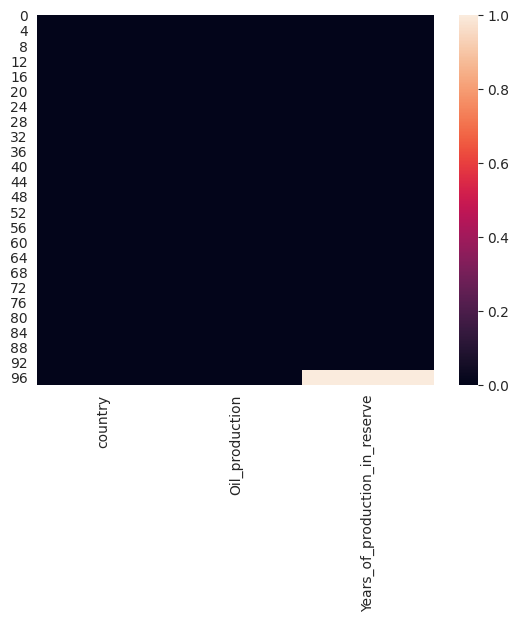

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(oil_countries.isnull(), cbar=True)
plt.show()

- All this does not matter for oil production since all we want is a binary 'yes' or 'no' to the question, is it an oil producing country?
- Therefore we can drop the reserves and production numbers.

In [41]:
oil_countries.drop(['Oil_production', 'Years_of_production_in_reserve'], axis = 1, inplace=True)
oil_countries['oil_producing'] = 1
oil_countries.to_csv('/content/drive/MyDrive/oil_countries.csv')
oil_countries.sample(5)

,country,oil_producing
58,Papua New Guinea,1
53,Bolivia,1
36,Gabon,1
52,Trinidad and Tobago,1
61,Niger,1


In [42]:
# Data on inequality as measured by the gini index https://worldpopulationreview.com/country-rankings/gini-coefficient-by-country
gini_index = pd.read_csv(r'/content/drive/MyDrive/gini.csv')
gini_index.head()

,pop2023,country,Combined Gini
0,60414495,South Africa,63.0
1,2604172,Namibia,59.1
2,623236,Suriname,57.9
3,20569737,Zambia,57.1
4,231856,Sao Tome and Principe,56.3


In [43]:
gini_index.sample(10)

,pop2023,country,Combined Gini
73,277534122,Indonesia,38.2
53,6687717,Bulgaria,41.3
140,10612086,Sweden,30.0
108,10143543,Tajikistan,34.0
5,5742315,Central African Republic,56.2
83,34449825,Yemen,36.7
56,55100586,Kenya,40.8
90,1428627663,India,35.7
29,813834,Guyana,45.1
159,3435931,Moldova,25.7


In [44]:
gini_index = gini_index.rename(columns={'pop2023':'population'})
gini_index = gini_index.rename(columns={'Combined Gini':'gini_index'})
gini_index.sample(5)

,population,country,gini_index
60,1534937,Trinidad and Tobago,40.3
168,6014723,Singapore,45.9
12,36684202,Angola,51.3
72,626485,Montenegro,38.5
64,21893579,Sri Lanka,39.3


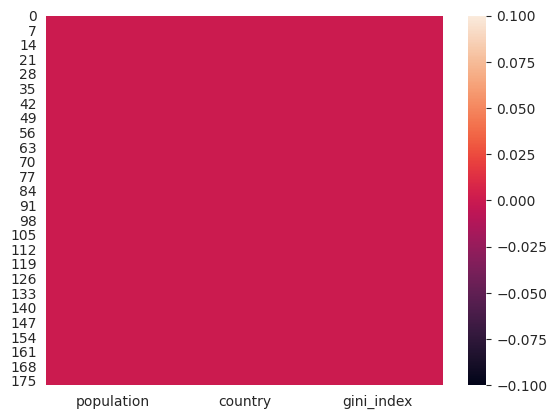

In [45]:
sns.heatmap(gini_index.isnull(), cbar=True)
plt.show()

- No null values here.
- Check for number of countries.

In [46]:
gini_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  177 non-null    int64  
 1   country     177 non-null    object 
 2   gini_index  177 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.3+ KB


In [47]:
#final_coups.to_csv('/content/drive/MyDrive/final.csv')

In [48]:
all_countries = pd.read_csv(r'/content/drive/MyDrive/all_countries.csv')
all_countries.head()

,country
0,Afghanistan
1,Albania
2,Algeria
3,Andorra
4,Angola


In [49]:
all_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  193 non-null    object
dtypes: object(1)
memory usage: 1.6+ KB


In [50]:
# Data on deomcratic index as reported by the Economist Intelligence(EIU) index https://www.eiu.com/n/campaigns/democracy-index-2022/
demo_index = pd.read_csv(r'/content/drive/MyDrive/demo_index.csv' , encoding='latin-1')
demo_index = demo_index.rename(columns={'Overall score': 'democracy_index'})
demo_index.head()

,country,democracy_index
0,Afghanistan,0.32
1,Albania,6.41
2,Algeria,3.66
3,Angola,3.96
4,Argentina,6.85


- Democracy index data has 167 countries.
- All_countries has 192 countries.
- gini_index has 177 countries.
- Oil data has 105 countries.
- How to reconcile all this data?
- We will use the democracy data as our base, countries not in there will be dropped.
- Oil data will be used in totality as this is just the list of countries which produce oil, all others do not.
We can join all these data frames with using the country columns then drop all the null values.

In [51]:
demo_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          167 non-null    object 
 1   democracy_index  167 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.7+ KB


In [52]:
combo = pd.merge(demo_index, all_countries, on='country', how='outer')
combo.sample(10)

,country,democracy_index
126,Myanmar,0.74
92,Jamaica,7.13
32,Central African Republic,1.35
169,South Sudan,NaN
103,Lesotho,6.19
111,Malawi,5.91
173,Sudan,2.47
181,Thailand,6.67
154,Saint Lucia,NaN
1,Albania,6.41


In [53]:
combo2 = pd.merge(combo, oil_countries, on='country', how='outer')
combo2.sample(5)

,country,democracy_index,oil_producing
9,Austria,8.20,1.0
167,Slovenia,7.75,NaN
29,Cambodia,3.18,NaN
102,Laos,1.77,NaN
129,Namibia,6.52,NaN


In [54]:
combo3 = pd.merge(combo2, gini_index, on='country', how='outer')
combo3.sample(5)

,country,democracy_index,oil_producing,population,gini_index
39,Congo,2.79,1.0,NaN,NaN
191,Syria,1.43,1.0,NaN,NaN
155,Poland,7.04,1.0,41026067.0,30.2
102,Kenya,5.05,NaN,55100586.0,40.8
213,Vanuatu,NaN,NaN,334506.0,37.6


In [55]:
combo3.describe()

,democracy_index,oil_producing,population,gini_index
count,167.000000,98.0,1.770000e+02,177.000000
mean,5.293174,1.0,4.491388e+07,37.947458
std,2.375860,0.0,1.565946e+08,8.411262
min,0.320000,1.0,3.791000e+03,0.300000
25%,3.110000,1.0,2.773168e+06,32.800000
50%,5.540000,1.0,1.032993e+07,36.700000
75%,7.100000,1.0,3.435272e+07,42.600000
max,9.810000,1.0,1.428628e+09,63.000000


In [56]:
combo3['oil_producing'] = combo3['oil_producing'].fillna(0)
combo3.sample(15)

,country,democracy_index,oil_producing,population,gini_index
145,North Macedonia,6.10,0.0,2085679.0,33.0
81,Guyana,6.34,1.0,813834.0,45.1
71,Georgia,5.20,1.0,3728282.0,35.9
216,Western Sahara,NaN,0.0,NaN,NaN
113,Liechtenstein,NaN,0.0,NaN,NaN
159,Romania,6.45,1.0,19892812.0,35.8
100,Jordan,3.17,0.0,11337052.0,33.7
8,Australia,8.71,1.0,26439111.0,34.4
127,Mexico,5.25,1.0,128455567.0,45.4
57,Equatorial Guinea,1.92,1.0,NaN,NaN


In [57]:
combo3.describe()

,democracy_index,oil_producing,population,gini_index
count,167.000000,220.000000,1.770000e+02,177.000000
mean,5.293174,0.445455,4.491388e+07,37.947458
std,2.375860,0.498149,1.565946e+08,8.411262
min,0.320000,0.000000,3.791000e+03,0.300000
25%,3.110000,0.000000,2.773168e+06,32.800000
50%,5.540000,0.000000,1.032993e+07,36.700000
75%,7.100000,1.000000,3.435272e+07,42.600000
max,9.810000,1.000000,1.428628e+09,63.000000


In [58]:
combo4 = pd.merge(combo3, country_coups, on='country', how='outer')
combo4.sample(5)

,country,democracy_index,oil_producing,population,gini_index,Number_of_coups
150,Norway,9.81,1.0,5474360.0,27.6,NaN
144,New Zealand,9.61,1.0,5228100.0,36.2,NaN
29,Cambodia,3.18,0.0,16944826.0,37.9,4.0
77,Ghana,6.43,1.0,34121985.0,43.5,5.0
20,Bosnia and Hercegovina,5.00,0.0,NaN,NaN,NaN


In [59]:
combo4.to_csv('/content/drive/MyDrive/combo4.csv')

In [60]:
combined = pd.read_csv('/content/drive/MyDrive/combo4.csv')
combined.sample(10)

,Unnamed: 0,country,democracy_index,oil_producing,population,gini_index,Number_of_coups
106,106,Kenya,5.05,0.0,55100586.0,40.8,NaN
229,229,Yemen PDR,NaN,NaN,NaN,NaN,4.0
9,9,Austria,8.20,1.0,8958960.0,30.8,NaN
161,161,Qatar,3.65,1.0,2716391.0,41.1,2.0
89,89,Hong Kong,5.28,0.0,7491609.0,53.9,NaN
69,69,Finland,9.29,0.0,5545475.0,27.3,NaN
164,164,Republic of the Congo,NaN,0.0,6106869.0,48.9,NaN
149,149,North Macedonia,6.10,0.0,2085679.0,33.0,NaN
0,0,Afghanistan,0.32,0.0,42239854.0,29.4,8.0
120,120,Macao,NaN,0.0,NaN,NaN,NaN


In [61]:
combined['Number_of_coups'] = combined['Number_of_coups'].fillna(0)
combined.sample(10)

,Unnamed: 0,country,democracy_index,oil_producing,population,gini_index,Number_of_coups
87,87,Holy See,NaN,0.0,NaN,NaN,0.0
71,71,French Guiana,NaN,0.0,NaN,NaN,0.0
180,180,Serbia,6.33,1.0,7149077.0,36.2,1.0
227,227,Yemen,1.95,1.0,34449825.0,36.7,1.0
179,179,Senegal,5.72,0.0,17763163.0,40.3,0.0
5,5,Antigua and Barbuda,NaN,0.0,NaN,NaN,0.0
93,93,Indonesia,6.71,1.0,277534122.0,38.2,2.0
34,34,Channel Islands,NaN,0.0,NaN,NaN,0.0
197,197,Swaziland,NaN,NaN,NaN,NaN,1.0
84,84,Guinea-Bissau,2.56,0.0,2150842.0,50.7,4.0


In [62]:
combined.describe()

,Unnamed: 0,democracy_index,oil_producing,population,gini_index,Number_of_coups
count,232.000000,167.000000,220.000000,1.770000e+02,177.000000,232.000000
mean,115.500000,5.293174,0.445455,4.491388e+07,37.947458,1.827586
std,67.116814,2.375860,0.498149,1.565946e+08,8.411262,2.829271
min,0.000000,0.320000,0.000000,3.791000e+03,0.300000,0.000000
25%,57.750000,3.110000,0.000000,2.773168e+06,32.800000,0.000000
50%,115.500000,5.540000,0.000000,1.032993e+07,36.700000,0.000000
75%,173.250000,7.100000,1.000000,3.435272e+07,42.600000,3.000000
max,231.000000,9.810000,1.000000,1.428628e+09,63.000000,16.000000


Now we need to add gdp data.

In [63]:
gdp = pd.read_csv('/content/drive/MyDrive/gdp_per_capita_2019.csv')
gdp.head()

,country,gdp_per_capita
0,Aruba,38435.426620
1,Africa Eastern and Southern,4073.653989
2,Afghanistan,2927.245144
3,Africa Western and Central,4822.310180
4,Angola,8274.542562


In [64]:
combo5 = pd.merge(combo4, gdp, on='country', how='outer')
combo5.sample(5)

,country,democracy_index,oil_producing,population,gini_index,Number_of_coups,gdp_per_capita
168,Low income,NaN,NaN,NaN,NaN,NaN,2406.662161
74,East Asia & Pacific (IDA & IBRD countries),NaN,NaN,NaN,NaN,NaN,16941.964380
70,Dominica,NaN,0.0,NaN,NaN,NaN,17619.433540
322,Zambia,5.8,0.0,20569737.0,57.1,NaN,3591.564189
189,"Middle East, North Africa, Afghanistan & Pakis...",NaN,NaN,NaN,NaN,NaN,9501.270848


In [65]:
final = pd.read_csv('/content/drive/MyDrive/final.csv')
final.head()

,country,democracy_index,oil_producing,population,gini_index,Number_of_coups,gdp_per_capita
0,Afghanistan,0.32,0,42239854,29.4,8.0,2927.245144
1,Albania,6.41,1,2832439,33.2,NaN,15078.50697
2,Algeria,3.66,1,45606480,27.6,7.0,15199.199
3,Angola,3.96,1,36684202,51.3,1.0,8274.542562
4,Argentina,6.85,1,45773884,42.9,9.0,26629.55294


Fill the NaN values in 'Number_of_coups' with 0

In [66]:
final['Number_of_coups'] = final['Number_of_coups'].fillna(0)
final.describe()

,democracy_index,oil_producing,gini_index,Number_of_coups
count,156.000000,156.000000,156.000000,156.000000
mean,5.427436,0.557692,38.114744,2.391026
std,2.339720,0.498260,7.995989,3.165487
min,0.320000,0.000000,24.600000,0.000000
25%,3.177500,0.000000,32.700000,0.000000
50%,5.695000,1.000000,36.450000,1.000000
75%,7.195000,1.000000,42.825000,4.000000
max,9.810000,1.000000,63.000000,16.000000


In [67]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          156 non-null    object 
 1   democracy_index  156 non-null    float64
 2   oil_producing    156 non-null    int64  
 3   population       156 non-null    object 
 4   gini_index       156 non-null    float64
 5   Number_of_coups  156 non-null    float64
 6   gdp_per_capita   156 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 8.7+ KB


Convert 'population' and 'gdp_per_capita' from object to float

In [68]:
final['population'] = (
    final['population'].str.replace(",","", regex=False) # remove commas
    .astype(float)
)
final['gdp_per_capita'] = (
    final['gdp_per_capita'].str.replace(",","", regex=False) # remove commas
    .astype(float)
)

final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          156 non-null    object 
 1   democracy_index  156 non-null    float64
 2   oil_producing    156 non-null    int64  
 3   population       156 non-null    float64
 4   gini_index       156 non-null    float64
 5   Number_of_coups  156 non-null    float64
 6   gdp_per_capita   156 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 8.7+ KB


In [69]:
final.describe()

,democracy_index,oil_producing,population,gini_index,Number_of_coups,gdp_per_capita
count,156.000000,156.000000,1.560000e+02,156.000000,156.000000,156.000000
mean,5.427436,0.557692,5.083436e+07,38.114744,2.391026,24655.788427
std,2.339720,0.498260,1.659715e+08,7.995989,3.165487,25300.439995
min,0.320000,0.000000,3.753180e+05,24.600000,0.000000,557.040000
25%,3.177500,0.000000,5.224118e+06,32.700000,0.000000,5764.022826
50%,5.695000,1.000000,1.205667e+07,36.450000,1.000000,15215.252310
75%,7.195000,1.000000,3.717028e+07,42.825000,4.000000,37225.433270
max,9.810000,1.000000,1.428628e+09,63.000000,16.000000,132724.752700


In [70]:
final.head(5)

,country,democracy_index,oil_producing,population,gini_index,Number_of_coups,gdp_per_capita
0,Afghanistan,0.32,0,42239854.0,29.4,8.0,2927.245144
1,Albania,6.41,1,2832439.0,33.2,0.0,15078.506970
2,Algeria,3.66,1,45606480.0,27.6,7.0,15199.199000
3,Angola,3.96,1,36684202.0,51.3,1.0,8274.542562
4,Argentina,6.85,1,45773884.0,42.9,9.0,26629.552940


- Create a target column 'coup' where if a country has experienced a coup, that value is 1 otherwise it is 0.
- Next we will encode the data i.e. country data.
- Then we will split into training and test set then run models on it.

In [71]:
final.isna().any()

,0
country,False
democracy_index,False
oil_producing,False
population,False
gini_index,False
Number_of_coups,False
gdp_per_capita,False


In [72]:
final['coup'] = (final['Number_of_coups'] !=0).astype(int)
final.sample(5)

,country,democracy_index,oil_producing,population,gini_index,Number_of_coups,gdp_per_capita,coup
29,Comoros,3.20,0,852075.0,45.3,6.0,3357.897914,1
21,Cambodia,3.18,0,16944826.0,37.9,4.0,6448.884560,1
87,Mali,3.23,0,23293698.0,33.0,3.0,2916.170694,1
99,Nepal,4.49,0,30896590.0,32.8,3.0,4607.524547,1
135,Taiwan,8.99,1,23923276.0,33.6,0.0,47800.000000,0


We now have a training dataset (countries_with_coup_data) with countries that have had coups along with their vital indexes as well as a list of all coutries (combined) with the vital data that we can now use to forecast coups.

In [73]:
# save dataset
final.to_csv('/content/drive/MyDrive/final_with_target.csv')

## Modeling




### Model 1 : Random Forests

In [74]:
# select features and target form the dataset
X = final.loc[:,['democracy_index', 'oil_producing',	'population',	'gini_index',	'Number_of_coups', 'gdp_per_capita']] # features
y = final['coup'] # target

# create the train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#import random forest model
from sklearn.ensemble import RandomForestClassifier

# create a Gaussian clasiffier
clf = RandomForestClassifier(n_estimators=100)

# Train the model using the training data
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)

# model is trained so we check the accuracy
# import scikit-learn metrics modeule for accuracy calculation
from sklearn import metrics
# model accuracy, how often is the classifier correct?
print('Accuracy: ', metrics.accuracy_score(y_test, y_predicted))

Accuracy:  1.0


In [75]:
# Using StratifiedKFold
from sklearn.model_selection import StratifiedKFold, cross_val_score

# create train/test split - stratified
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# set up StratifiedKFold CV for training set
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# create model and run data
rf_model = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=skf, scoring='accuracy')

print('CV accuracy per fold: ', cv_scores)
print('Mean CV accuracy: ', cv_scores.mean())

# fit model on full training set
rf_model.fit(X_train, y_train)

# Evaluate on holdout test set
test_accuracy = rf_model.score(X_test, y_test)
print('Holdout test accuracy:', test_accuracy)

CV accuracy per fold:  [0.96 1.   1.   1.   1.  ]
Mean CV accuracy:  0.992
Holdout test accuracy: 1.0


We have a high accuracy but this could just mean that our data is overfitting.

In [76]:
# feature importance on basic random forest model
feature_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_imp

,0
Number_of_coups,0.702451
gdp_per_capita,0.114222
democracy_index,0.095862
population,0.043598
gini_index,0.038333
oil_producing,0.005534


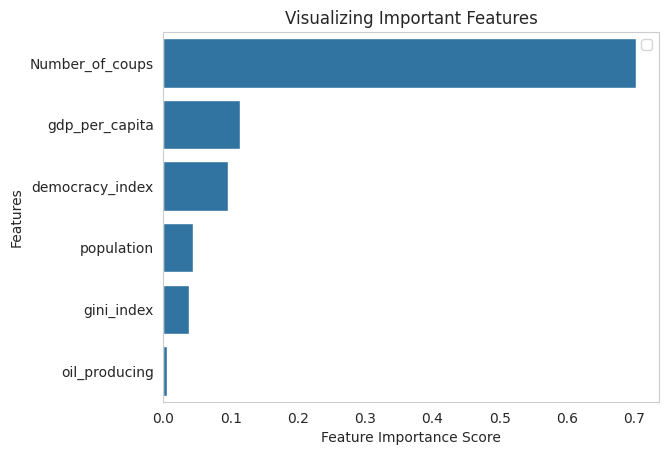

In [77]:
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

From the bar chart above, it seems that the most important predictor for political stability is the democracy level of a country i.e. the more democratic the nation the less likely that it will experience a coup. Next is the level of economic inequality in the country, the lower the inequality the less likely that it will experience a coup.

In [78]:
# feature importance on basic random forest model
feature_imp_new = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_imp_new

,0
Number_of_coups,0.712875
gdp_per_capita,0.100660
democracy_index,0.100185
gini_index,0.044927
population,0.040035
oil_producing,0.001319


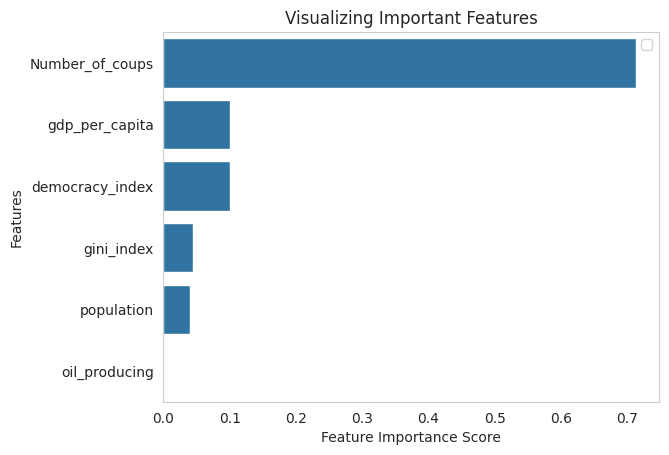

In [79]:
sns.barplot(x=feature_imp_new, y=feature_imp_new.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [80]:
final.groupby(['country']).get_group('Zambia')

,country,democracy_index,oil_producing,population,gini_index,Number_of_coups,gdp_per_capita,coup
154,Zambia,5.8,0,20569737.0,57.1,0.0,3591.564189,0


In [81]:
# To predict whether a country may experience a coup we need its Gini score, democracy index and whether it's oil producing or not.
clf.predict([[0.1, 1, 4569875, 64.5, 1, 956.32]]) # this is data for Germany -> prediction is no coup.

array([1])

**Model 2 : Decision Trees**

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [83]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

Decision Trees Accuracy

In [84]:
predictions = model.predict(X_test)

score = accuracy_score(y_test, predictions)
score

1.0

Decision Trees Visualizer

In [85]:
from sklearn.tree import export_graphviz

FEATURE_NAMES = ['democracy_index', 'oil_producing',	'population',	'gini_index',	'Number_of_coups', 'gdp_per_capita']

export_graphviz(model, 'tree.dot', feature_names = FEATURE_NAMES)

In [86]:
! dot -Tpng tree.dot -o tree.png

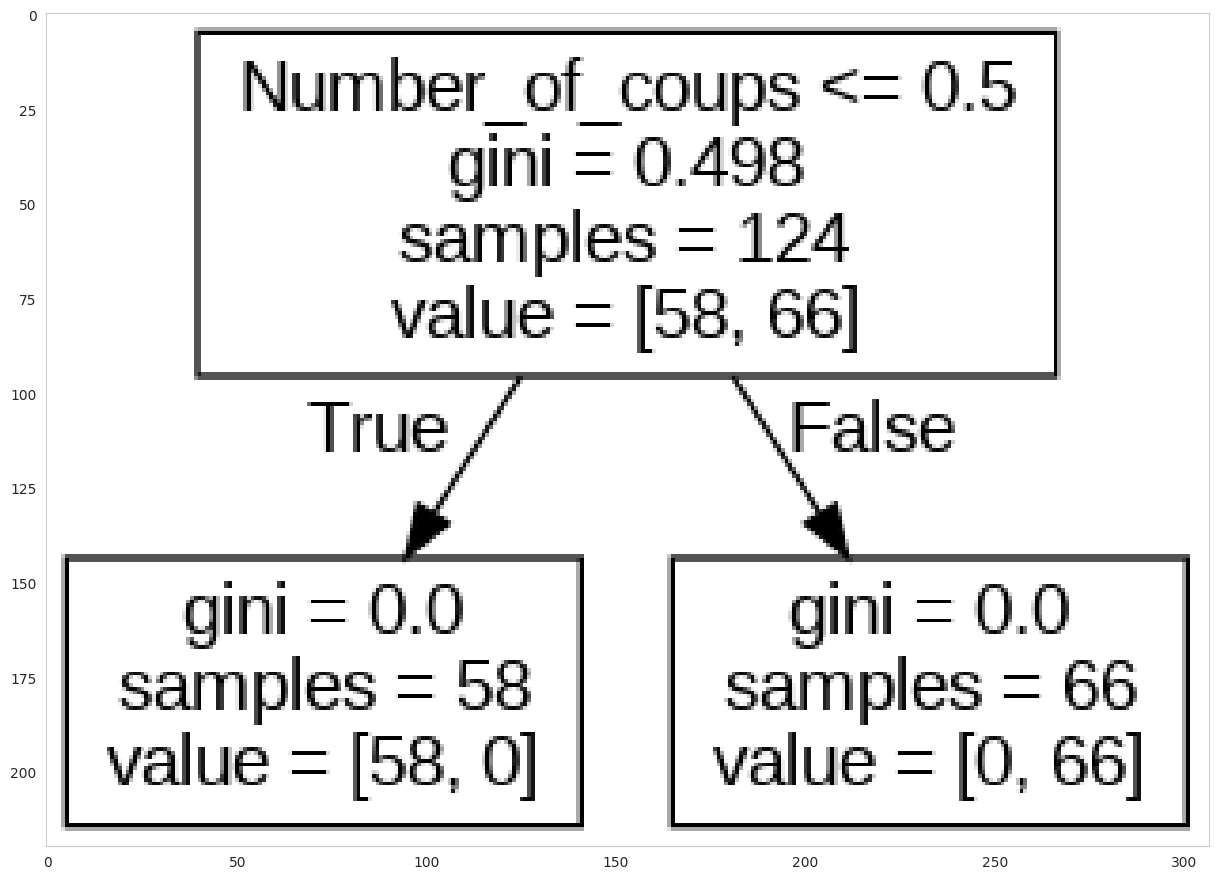

In [87]:

import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (15, 15))
plt.imshow(img)

### Model 3: Multiple Linear Regression

[ 0.54723952  0.69144174  0.24118281  0.19572288  0.17294929  0.60055412
  0.81422531  1.22052859  0.22307357  0.02960902  0.59044512  0.39543056
  0.2131904   1.16708791  0.56346172  0.19238737  0.48094698  0.37570827
  0.99210297  0.84426828  0.29230051  0.88315947  0.14778589  2.07148151
  0.89748591  0.59102205  1.04134183 -0.10929199  0.89861567  0.31084028
  0.21653028  0.26099482]


,Actual Value,Predicted Value,Difference
153,1,0.547240,0.452760
131,1,0.691442,0.308558
129,0,0.241183,-0.241183
6,0,0.195723,-0.195723
51,0,0.172949,-0.172949
116,1,0.600554,0.399446
80,1,0.814225,0.185775
39,1,1.220529,-0.220529
5,0,0.223074,-0.223074
62,0,0.029609,-0.029609


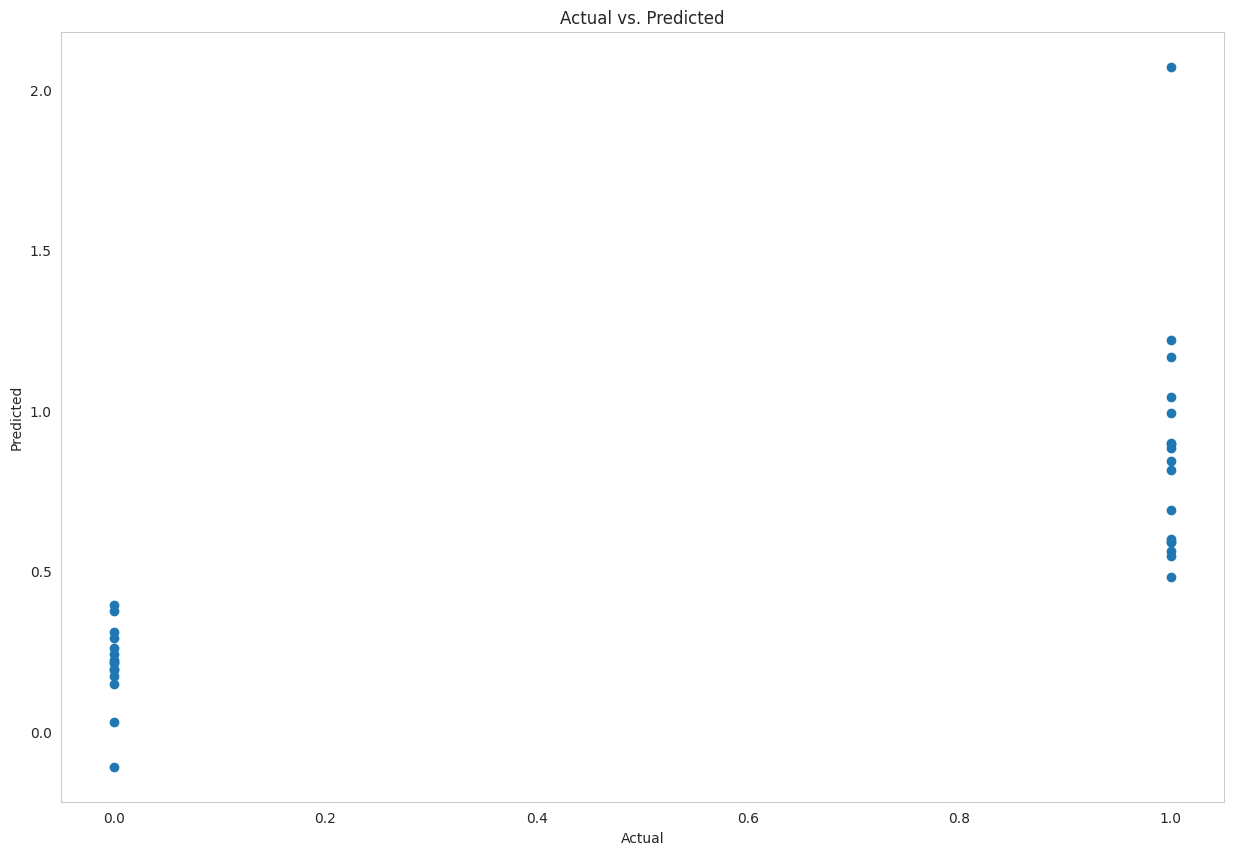

In [88]:
#Train the model on the training set
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(X_train,y_train)


#Predict Test Results
y_pred = ml.predict(X_test)
print(y_pred)


#Evaluate the Model
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


#Plot the results
plt.figure(figsize=(15,10))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.scatter(y_test,y_pred)


pred_y_df = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred, 'Difference':y_test-y_pred})
pred_y_df[0:20]
